In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import matplotlib.pyplot as plt 
import math as mt

In [2]:
loss_tracker = keras.metrics.Mean(name="loss")

class Function(keras.Model):
    def train_step(self, data):
        batch_size = 10
        x = tf.random.uniform((batch_size,), minval=-1, maxval=1) 
        # Se crea un tensor que va desde -1 hasta 1 de forma uniforme
        eq = 1 + 2*tf.square(x) + 4*tf.pow(x, 3)


        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            loss = keras.losses.mean_squared_error(y_pred,eq)

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [3]:
class PolyTransform(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(PolyTransform,self).__init__()
        
        self.num_outputs = num_outputs
        self.kernel = self.add_weight("kernel",
                                shape=[self.num_outputs]) # Pesos que harán de coeficientes

    def call(self, inputs):
        inputs = tf.convert_to_tensor(inputs)
        if (inputs.shape == ()):
            inputs=(inputs,)
        elif (len(inputs.shape)==1):
            inputs=tf.expand_dims(inputs, axis=1)
            
        modes = tf.concat([tf.ones_like(inputs), inputs, inputs**2, inputs**3], axis=1)
        return tf.tensordot(modes,self.kernel,1) # Producto punto entre a_i * x^i 

In [4]:
inputs = keras.Input(shape=(1,))
x = PolyTransform(4)(inputs)

model = Function(inputs=inputs,outputs=x)
model.compile(optimizer=Adam(learning_rate=0.1), metrics=['loss'])

x = tf.linspace(-1,1,100)
history = model.fit(x,epochs=50,verbose=1)

Epoch 1/50
4/4 [==============================] - 0s 953us/step - loss: 5.6756
Epoch 2/50
4/4 [==============================] - 0s 977us/step - loss: 4.4767
Epoch 3/50
4/4 [==============================] - 0s 958us/step - loss: 3.5081
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 2.7360
Epoch 5/50
4/4 [==============================] - 0s 956us/step - loss: 2.2758
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 1.9628
Epoch 7/50
4/4 [==============================] - 0s 1ms/step - loss: 1.7223
Epoch 8/50
4/4 [==============================] - 0s 922us/step - loss: 1.5609
Epoch 9/50
4/4 [==============================] - 0s 895us/step - loss: 1.4432
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 1.3368
Epoch 11/50
4/4 [==============================] - 0s 1ms/step - loss: 1.2373
Epoch 12/50
4/4 [==============================] - 0s 906us/step - loss: 1.1511
Epoch 13/50
4/4 [==============================] - 0s 932us

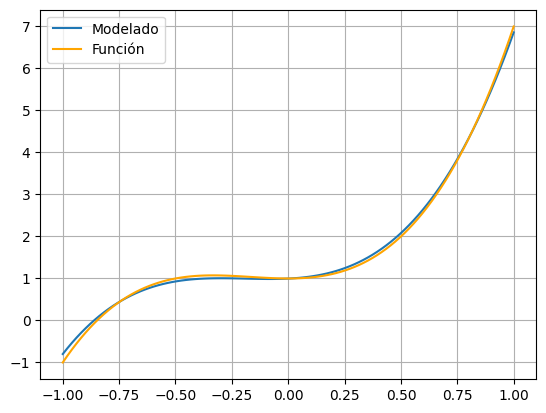

In [7]:
plt.plot(x_testv, a, label="Modelado")
plt.plot(x_testv, 1 + 2*x**2 + 4*x**3, label = "Función", color = "orange")
plt.legend()
plt.grid()
plt.show()